#### 단어의 의미를 파악하는 방법
- 시소러스를 활용한 기법 Thesaurus(WordNet)
- 통계 기반 방법
- 추론 기반 기법(word2vec)

<b>통계 기반 기법</b>

파이썬으로 말뭉치 전처리하기

In [1]:
#예시 문장
text = 'You say goodbye and I say hello.'

In [2]:
text = text.lower()#소문자로 변환
text = text.replace('.',' .')
text

'you say goodbye and i say hello .'

In [4]:
words = text.split(' ')#공백을 기준으로 분할
words

['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [5]:
word_to_id = {}#단어에서 단어ID로의 변환 딕셔너리
id_to_word = {}#단어ID에서 단어로의 변환 딕셔너리

for word in words:
    if word not in word_to_id:#단어가 들어있지 않으면
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

In [6]:
#단어ID와 단어의 대응표
print(id_to_word)
print(word_to_id)

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}
{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}


In [7]:
id_to_word[1]

'say'

In [8]:
word_to_id['say']

1

In [9]:
word_to_id['hello']

5

In [10]:
id_to_word[5]

'hello'

In [11]:
import numpy as np
corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [12]:
def preprocess(text):#말뭉치 전처리 함수
    text = text.lower()#소문자로 변환
    text = text.replace('.',' .')
    words = text.split(' ')#공백을 기준으로 나누기
    
    word_to_id = {}
    id_to_word = {}
    for word in words:#단어 ID와 단어의 대응표 만들기
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word

In [13]:
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [14]:
print('corpus:',corpus)
print('word_to_id:',word_to_id)
print('id_to_word:',id_to_word)

corpus: [0 1 2 3 4 1 5 6]
word_to_id: {'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
id_to_word: {0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [15]:
t2 = 'Never defeat. This is a message forward slash upcoming tests.'
co, wo, id = preprocess(t2)
print(co)
print(wo)
print(id)

[ 0  1  2  3  4  5  6  7  8  9 10  2]
{'never': 0, 'defeat': 1, '.': 2, 'this': 3, 'is': 4, 'a': 5, 'message': 6, 'forward': 7, 'slash': 8, 'upcoming': 9, 'tests': 10}
{0: 'never', 1: 'defeat', 2: '.', 3: 'this', 4: 'is', 5: 'a', 6: 'message', 7: 'forward', 8: 'slash', 9: 'upcoming', 10: 'tests'}


In [16]:
#동시 발생 행렬 생성 함수
def create_co_matrix(corpus, vocab_size, window_size = 1):#단어ID리스트, 어휘수, 윈도우 크기
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype = np.int32)
    
    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx-i
            right_idx = idx+i
            
            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id]+=1
            
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id]+=1
    
    return co_matrix

<b>벡터 간 유사도</b>

### 코사인 유사도(cosine similarity)
$\Rightarrow$ '두 벡터가 가리키는 방향이 얼마나 비슷한가'<br>
벡터의 방향이 완전히 같다면 코사인 유사도는 1이 되고, 완전히 반대라면 코사인 유사도는 -1이 됨.
<br>

$$similarity(x,y) = \frac{x\cdot y}{\parallel x\parallel\parallel y\parallel} = \frac{x_1y_1+\cdot\cdot\cdot+x_ny_n}{\sqrt{x_1^2+\cdot\cdot\cdot+x_n^2}\sqrt{y_1^2+\cdot\cdot\cdot+y_n^2}}$$

분자: 벡터의 내적<br>
분모: 벡터의 노름norm(L2노름)

In [17]:
def cos_similarity(x,y):#코사인 유사도 구현
    nx = x/np.sqrt(np.sum(x**2))#x의 정규화
    ny = y/np.sqrt(np.sum(y**2))#y의 정규화
    
    return np.dot(nx,ny)

In [18]:
#0으로 나누는 오류 방지
def cos_similarity(x,y,eps =1e-8):
    nx = x/(np.sqrt(np.sum(x**2))+eps)
    ny = y/(np.sqrt(np.sum(y**2))+eps)
    return np.dot(nx,ny)

<br>
you와 I사이의 유사도 구하기

In [19]:
text

'You say goodbye and I say hello.'

In [20]:
corpus

array([0, 1, 2, 3, 4, 1, 5, 6])

In [21]:
word_to_id

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}

In [22]:
id_to_word

{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}

In [23]:
vocab_size = len(word_to_id)
vocab_size

7

In [25]:
C = create_co_matrix(corpus, vocab_size)#동시 발생 행렬
C

array([[0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0]])

In [26]:
c0 = C[word_to_id['you']]#you의 단어 벡터
c0

array([0, 1, 0, 0, 0, 0, 0])

In [29]:
c1 = C[word_to_id['i']]#I의 단어 벡터
c1

array([0, 1, 0, 1, 0, 0, 0])

In [31]:
cos_similarity(c0,c1)#코사인 유사도의 범위는 -1~1이므로 비교적 높다(유사성이 크다)고 설명할 수 있다

0.7071067691154799

<br>
유사 단어의 랭킹 표시<br>
:어떤 단어가 검색어로 주어지면, 그 검색어와 비슷한 단어를 유사도 순으로 출력하는 함수
<br>

1. 검색어의 단어 벡터를 꺼낸다
2. 검색어의 단어 벡터와 다른 모든 단어 벡터와의 코사인 유사도를 각각 구한다
3. 계산한 코사인 유사도 결과를 기준으로 값이 높은 순서대로 출력한다

In [59]:
def most_similar(query, word_to_id, id_to_word, word_matrix, top=5):#유사 단어의 랭킹 출력
    '''
    <인수>
    query: 검색어(단어)
    word_to_id: 단어에서 단어ID로의 딕셔너리
    id_to_word: 단어 ID에서 단어로의 딕셔너리
    word_matrix: 단어 벡터들을 한데 모은 행렬, 각 행에는 대응하는 벡터가 저장되어 있다고 가정한다.
    top: 상위 몇 개까지 출력하맂 설정
    
    '''
    #검색어를 꺼낸다
    if query not in word_to_id:#찾는 검색어가 없으면
        print('%s(을)를 찾을 수 없습니다.'%query)
        return
    
    print('\n[query]: '+query)
    query_id = word_to_id[query]
    query_vec = word_matrix[query_id]
    
    #코사인 유사도 계산
    vocab_size = len(word_to_id)
    similarity = np.zeros(vocab_size)
    for i in range(vocab_size):
        similarity[i] = cos_similarity(word_matrix[i],query_vec)#다른 단어와 검색어의 코사인 유사도
        
    #코사인 유사도를 기준으로 내림차순으로 출력
    count = 0
    print('\n')
    for i in (-1*similarity).argsort():#인덱스를 내림차순으로 정렬(-1 x 오름차순 정렬)
        if id_to_word[i] == query:#검색어는 표시에서 제외
            continue
        print('%d. %s: %s'%(count+1, id_to_word[i], similarity[i]))
        count +=1
        if count >= top:
            return
    

In [60]:
x = np.array([100,-20,2])
print(x.argsort())#오름차순으로 정렬(작은 것부터 출력)
print(x[x.argsort()])

[1 2 0]
[-20   2 100]


In [61]:
(-x).argsort()#내림차순으로 정렬(큰 순서로 출력)

array([0, 2, 1], dtype=int64)

In [62]:
print((-x).argsort())

[0 2 1]


In [63]:
#유사 단어 랭킹 표시 함수 사용해보기
text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)

#검색어: you
most_similar('you', word_to_id, id_to_word, C, top = 5)


[query]: you


1. goodbye: 0.7071067691154799
2. i: 0.7071067691154799
3. hello: 0.7071067691154799
4. say: 0.0
5. and: 0.0


<br>통계 기반 기법 개선하기<br>

<b>점별 상호정보량(Pointwise Mutual Information, PMI)</b><br>
$$PMI(x,y) = log_2\frac{P(x,y)}{P(x)P(y)} = log_w\frac{\frac{C(x,y)}{N}}{\frac{C(x)}{N}\frac{C(y)}{N}} = log_2\frac{C(x,y)\cdot N}{C(x)C(y)}$$
<br>
P(x): x가 일어날 확률<br>
P(y): y가 일어날 확률<br>
P(x,y): x와 y가 동시에 확률<br>
PMI 값이 높을수록 관련성이 높다
<br><br><br>

<b>양의 상호정보량(Positive PMI, PPMI)</b><br>

$$PPMI(x,y) = max(0,PMI(x,y))$$

In [67]:
def ppmi(C, verbose = False, eps = 1e-8):#양의 상호정보량
    M = np.zeros_like(C,dtype = np.float32)#반환값
    N = np.sum(C)#단어수
    S = np.sum(C, axis = 0)
    total = C.shape[0]*C.shape[1]
    cnt = 0
    
    for i in range(C.shape[0]):
        for j in range(C.shape[1]):
            pmi = np.log2(C[i,j]*N/(S[j]*S[i])+eps)#pmi
            M[i,j] = max(0,pmi)#ppmi
            
            if verbose:#진행상황출력
                cnt +=1
                if cnt %(total//100) == 0:
                    print('%.1f%% 완료'%(100*cnt/total))
    return M

In [68]:
text

'You say goodbye and I say hello.'

In [69]:
#동시 발생 행렬을 PPMI행렬로 변환
corpus, word_to_id, id_to_word = preprocess(text)
vocab_size = len(word_to_id)
C = create_co_matrix(corpus, vocab_size)#동시 발생 행렬
W = ppmi(C)#ppmi

np.set_printoptions(precision=3)#유효 자릿수를 세 자리로 표시
print('동시발생 행렬')
print(C)
print('-'*50)
print('PPMI')
print(W)

동시발생 행렬
[[0 1 0 0 0 0 0]
 [1 0 1 0 1 1 0]
 [0 1 0 1 0 0 0]
 [0 0 1 0 1 0 0]
 [0 1 0 1 0 0 0]
 [0 1 0 0 0 0 1]
 [0 0 0 0 0 1 0]]
--------------------------------------------------
PPMI
[[0.    1.807 0.    0.    0.    0.    0.   ]
 [1.807 0.    0.807 0.    0.807 0.807 0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.    1.807 0.    1.807 0.    0.   ]
 [0.    0.807 0.    1.807 0.    0.    0.   ]
 [0.    0.807 0.    0.    0.    0.    2.807]
 [0.    0.    0.    0.    0.    2.807 0.   ]]


차원 축소
<b>특잇값분해 (Singular Value Decomposition, SVD)</b>
$$X = USV^T$$
<br>
SVD: 임의의 행렬 X를 U,S,V라는 세 행렬의 곱으로 분해<br>
- U: 직교행렬(orthogonal matrix)
- S: 대각행렬; 특잇값(singular value)가 큰 순서로 나열되어 있음
- U와 V는 직교행렬

In [70]:
#SVD에 의한 차원 감소
C = create_co_matrix(corpus, vocab_size, window_size=1)#동시 발생 행렬
W = ppmi(C)#동시 발생 행렬을 ppmi로 변환
U, S, V = np.linalg.svd(W)#ppmi 행렬에 SVD 적용

In [74]:
#밀집 벡터 표현은 변수 U에 저장됨

#ID가 0인 단어 벡터로 확인

print('동시 발생 행렬\n',C[0])#동시 발생 행렬

print('\n\nppmi 행렬\n',W[0])#ppmi 행렬

print('\n\nSVD행렬\n',U[0])#SVD

동시 발생 행렬
 [0 1 0 0 0 0 0]


ppmi 행렬
 [0.    1.807 0.    0.    0.    0.    0.   ]


SVD행렬
 [ 3.409e-01 -1.110e-16 -4.441e-16 -1.205e-01  0.000e+00 -9.323e-01
 -1.086e-16]


In [75]:
#밀집 벡터(U)의 차원 감소
print(U[0,:2])#예컨대 2차원 벡터로 줄임

[ 3.409e-01 -1.110e-16]


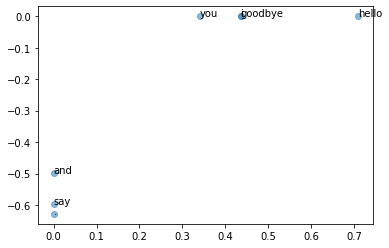

In [76]:
#각 단어를 2차원 벡터로 표현 후 그래프로 시각화
import matplotlib.pyplot as plt

for word, word_id in word_to_id.items():
    plt.annotate(word, (U[word_id,0],U[word_id,1]))


plt.scatter(U[:,0],U[:,1],alpha = 0.5)
plt.show()

i와 goodbye가 겹쳐있음

In [77]:
#PTB 데이터셋
import sys
sys.path.append('..')
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')

print('말뭉치 크기:', len(corpus))
print('corpus[:30]:',corpus[:30])#단어 ID 목록 저장된 딕셔너리
print()
print('id_to_word[0]:', id_to_word[0])
print('id_to_word[1]:', id_to_word[1])
print('id_to_word[2]:', id_to_word[2])
print()
print("word_to_id['car']:", word_to_id['car'])
print("word_to_id['happy']:", word_to_id['happy'])
print("word_to_id['lexus']:", word_to_id['lexus'])

Done
말뭉치 크기: 929589
corpus[:30]: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

id_to_word[0]: aer
id_to_word[1]: banknote
id_to_word[2]: berlitz

word_to_id['car']: 3856
word_to_id['happy']: 4428
word_to_id['lexus']: 7426


In [79]:
#PTB 데이터셋에 통계 기반 기법 적용
window_size =2
wordvec_size = 100

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)

print('동시발생 수 계산 ...')
C = create_co_matrix(corpus, vocab_size, window_size)
print(C[:10])
print('\n\nPPMI 계산 ...')
W = ppmi(C, verbose=True)
print(W[:10])

print('\n\nSVD 계산...')
try:
    #truncated SVD (빠르다!)
    from sklearn.utils.extmath import randomized_svd
    U, S, V = randomized_svd(W, n_components=wordvec_size, n_iter=5,#무작위수를 사용한 Truncated SVD
                            random_state = None)#특이값이 큰 것들만 계산하여 기본적인 SVD보다 빠름

except ImportError:
    #SVD(느리다)
    print('느린 SVD')
    U, S, V = np.linalg.svd(W)
    
word_vecs = U[:,:wordvec_size]

querys = ['you', 'year','car','toyota']
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs, top= 5)

동시발생 수 계산 ...
[[0 1 1 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


PPMI 계산 ...


<ipython-input-67-ce001d116fea>:10: RuntimeWarning: overflow encountered in long_scalars
  pmi = np.log2(C[i,j]*N/(S[j]*S[i])+eps)#pmi
<ipython-input-67-ce001d116fea>:10: RuntimeWarning: invalid value encountered in log2
  pmi = np.log2(C[i,j]*N/(S[j]*S[i])+eps)#pmi


1.0% 완료
2.0% 완료
3.0% 완료
4.0% 완료
5.0% 완료
6.0% 완료
7.0% 완료
8.0% 완료
9.0% 완료
10.0% 완료
11.0% 완료
12.0% 완료
13.0% 완료
14.0% 완료
15.0% 완료
16.0% 완료
17.0% 완료
18.0% 완료
19.0% 완료
20.0% 완료
21.0% 완료
22.0% 완료
23.0% 완료
24.0% 완료
25.0% 완료
26.0% 완료
27.0% 완료
28.0% 완료
29.0% 완료
30.0% 완료
31.0% 완료
32.0% 완료
33.0% 완료
34.0% 완료
35.0% 완료
36.0% 완료
37.0% 완료
38.0% 완료
39.0% 완료
40.0% 완료
41.0% 완료
42.0% 완료
43.0% 완료
44.0% 완료
45.0% 완료
46.0% 완료
47.0% 완료
48.0% 완료
49.0% 완료
50.0% 완료
51.0% 완료
52.0% 완료
53.0% 완료
54.0% 완료
55.0% 완료
56.0% 완료
57.0% 완료
58.0% 완료
59.0% 완료
60.0% 완료
61.0% 완료
62.0% 완료
63.0% 완료
64.0% 완료
65.0% 완료
66.0% 완료
67.0% 완료
68.0% 완료
69.0% 완료
70.0% 완료
71.0% 완료
72.0% 완료
73.0% 완료
74.0% 완료
75.0% 완료
76.0% 완료
77.0% 완료
78.0% 완료
79.0% 완료
80.0% 완료
81.0% 완료
82.0% 완료
83.0% 완료
84.0% 완료
85.0% 완료
86.0% 완료
87.0% 완료
88.0% 완료
89.0% 완료
90.0% 완료
91.0% 완료
92.0% 완료
93.0% 완료
94.0% 완료
95.0% 완료
96.0% 완료
97.0% 완료
98.0% 완료
99.0% 완료
100.0% 완료
[[ 0.    19.241 18.826 ...  0.     0.     0.   ]
 [19.241  0.    18.241 ...  0.     0.     0.   ]
 [18.826 1